# 0.netcdf概要

In [31]:
# netcdfの読み込み　datasetクラスで読み込もつroot groupが生成される
from netCDF4 import Dataset
nc = Dataset('/workspaces/akita_daizu/data/netcdf/TMP_AVE.NC', 'r')
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: 2022-01-19 02:17:00 GMT Hyrax-1.13.4 https://amd.rd.naro.go.jp:443/opendap/AMD/Area1/2021/AMD_Area1_Cli_TMP_mea.nc.nc?geogrid(TMP_mea,40.34763205639712,140.00639579051995,40.20499263124444,140.14306947743816,"44194<time","time<44519")
    dimensions(sizes): time(324), lat(19), lon(12)
    variables(dimensions): float64 time(time), float32 lat(lat), float32 lon(lon), float32 TMP_mea(time, lat, lon)
    groups: 

In [32]:
# 観測次元
nc.dimensions

{'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 324,
 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 19,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 12}

In [33]:
# 格納されている値
nc.variables.keys()

dict_keys(['time', 'lat', 'lon', 'TMP_mea'])

In [34]:
#　格納されている値の内容を確認できる
nc['TMP_mea']
# データ構造は3次元　単位はdegC 大気温　セルシウス温度

<class 'netCDF4._netCDF4.Variable'>
float32 TMP_mea(time, lat, lon)
    _FillValue: 9.96921e+36
    long_name: Mean air temperature
    units: degC
unlimited dimensions: 
current shape = (324, 19, 12)
filling on

In [35]:
nc['time']
# 日時は1900/1/1から換算される値　1次元しかない

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: 9.969209968386869e+36
    calendar: standard
    units: days since 1900-1-1 00:00:0.0
unlimited dimensions: 
current shape = (324,)
filling on

In [37]:
# 以下のように入手したいItemと座標を定義することで値を取得できる
nc['TMP_mea'][100][10][10]

7.302135

In [8]:
# 次元の変数をインデックスで指定するとmasked_arrayが帰ってくる
nc['time'][100]

masked_array(data=44295.,
             mask=False,
       fill_value=1e+20)

In [38]:
# 型指定すると変数だけ帰ってくる
print(float(nc['time'][100]))


44295.0


In [39]:
# この時帰ってくる値は1900年からの日数だから以下の式で変換可能
from datetime import date, timedelta
start = date(1900,1,1) 
delta = timedelta(float(nc['time'][0]))
print(start + delta)   

2021-01-01


# 1.解析対象ポリゴンの読み込み


xarrayで圃場の位置で値を抽出するためポリゴンの位置をxarrayで’利用できる形に変更

In [12]:
import geopandas as gpd
df496 = gpd.read_file('/workspaces/akita_daizu/data/496+120圃場.geojson')

In [13]:
df496

,id,Address,CityCode,Address_2,LandCatego,Area,Agricult_1,Jurisdicti,名前_漢,作付年,...,Unnamed_ 1,作物名,転作利?,転作??,地権者_,播種月?,sensor_loc,distance,uniqueID,geometry
0,05100030469-068904,秋田県八峰町峰浜沼田坊塚下1-6,53490.0,秋田県八峰町峰浜沼田坊塚下1-6,1.0,1774.0,農業振興地域内・農用地区域内,八峰町農業委員会,斉藤 モヨ,None,...,17.03,大豆,農事組合法人八峰アグリプロ,峰浜石川字外林３３‐１６,斉藤 忠雄,7月4日,NaN,1650.0,3.0,"MULTIPOLYGON (((-68939.306 30479.236, -68939.1..."
1,05100031429-064065,秋田県八峰町峰浜塙下才神187,53490.0,秋田県八峰町峰浜塙下才神187,1.0,3012.0,農業振興地域内・農用地区域内,八峰町農業委員会,藤嶋 久徳,None,...,28.91,大豆,農事組合法人八峰アグリプロ,峰浜石川字外林３３‐１６,高杉 良一,6月27日,NaN,15875.0,104.0,"MULTIPOLYGON (((-64111.887 31451.133, -64103.7..."
2,05100031451-064046,秋田県八峰町峰浜塙下才神186,53490.0,秋田県八峰町峰浜塙下才神186,1.0,2936.0,農業振興地域内・農用地区域内,八峰町農業委員会,藤嶋 久徳,None,...,28.18,大豆,農事組合法人八峰アグリプロ,峰浜石川字外林３３‐１６,高杉 良一,6月27日,NaN,15900.0,105.0,"MULTIPOLYGON (((-64073.617 31493.233, -64015.1..."
3,05100031472-064026,秋田県八峰町峰浜塙下才神185,53490.0,秋田県八峰町峰浜塙下才神185,1.0,1324.0,農業振興地域内・農用地区域内,八峰町農業委員会,藤嶋 久徳,None,...,12.71,大豆,農事組合法人八峰アグリプロ,峰浜石川字外林３３‐１６,高杉 良一,6月27日,NaN,15925.0,106.0,"MULTIPOLYGON (((-64073.113 31494.343, -64054.1..."
4,05100030885-068966,秋田県八峰町峰浜沼田黒トフ5-2,53490.0,秋田県八峰町峰浜沼田黒トフ5-2,1.0,1239.0,農業振興地域内・農用地区域内,八峰町農業委員会,小林 信夫,None,...,55.02,大豆,農事組合法人八峰アグリプロ,峰浜石川字外林３３‐１６,小林 信夫,7月4日,NaN,2075.0,10.0,"MULTIPOLYGON (((-69035.773 30908.971, -68897.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,05100034652-067022,秋田県八峰町峰浜目名潟中渡上台178,NaN,None,NaN,NaN,None,None,None,None,...,NaN,None,None,None,None,None,NaN,NaN,NaN,"MULTIPOLYGON (((-67070.418 34623.648, -67073.4..."
492,05100030625-063981,秋田県八峰町峰浜石川外林308,NaN,None,NaN,NaN,None,None,None,None,...,NaN,None,None,None,None,None,NaN,NaN,NaN,"MULTIPOLYGON (((-63934.691 30645.134, -63940.3..."
493,05100032510-064783,秋田県八峰町峰浜塙館越89-1,NaN,None,NaN,NaN,None,None,None,None,...,NaN,None,None,None,None,None,NaN,NaN,NaN,"MULTIPOLYGON (((-64812.589 32475.961, -64812.6..."
494,05100033587-064704,秋田県八峰町峰浜塙野田堤下1-6,NaN,None,NaN,NaN,None,None,None,None,...,NaN,None,None,None,None,None,NaN,NaN,NaN,"MULTIPOLYGON (((-64679.722 33567.396, -64728.0..."


In [14]:
# 水田面積と耕地面積は同じ値なので削除、他にも解析に利用しない列は削除
df496_min = df496.drop(['Agricult_1', 'Jurisdicti', '名前_漢','LandCatego','転作??','転作利?','Address_2','地権者_','Unnamed_ 1','distance','水田面?','作物等?','作物名' ], axis=1)
df496_min

,id,Address,CityCode,Area,作付年,H23以前,耕地面?,播種月?,sensor_loc,uniqueID,geometry
0,05100030469-068904,秋田県八峰町峰浜沼田坊塚下1-6,53490.0,1774.0,None,?,1703.0,7月4日,NaN,3.0,"MULTIPOLYGON (((-68939.306 30479.236, -68939.1..."
1,05100031429-064065,秋田県八峰町峰浜塙下才神187,53490.0,3012.0,None,?,2891.0,6月27日,NaN,104.0,"MULTIPOLYGON (((-64111.887 31451.133, -64103.7..."
2,05100031451-064046,秋田県八峰町峰浜塙下才神186,53490.0,2936.0,None,?,2818.0,6月27日,NaN,105.0,"MULTIPOLYGON (((-64073.617 31493.233, -64015.1..."
3,05100031472-064026,秋田県八峰町峰浜塙下才神185,53490.0,1324.0,None,?,1271.0,6月27日,NaN,106.0,"MULTIPOLYGON (((-64073.113 31494.343, -64054.1..."
4,05100030885-068966,秋田県八峰町峰浜沼田黒トフ5-2,53490.0,1239.0,None,?,5502.0,7月4日,NaN,10.0,"MULTIPOLYGON (((-69035.773 30908.971, -68897.4..."
...,...,...,...,...,...,...,...,...,...,...,...
491,05100034652-067022,秋田県八峰町峰浜目名潟中渡上台178,NaN,NaN,None,None,NaN,None,NaN,NaN,"MULTIPOLYGON (((-67070.418 34623.648, -67073.4..."
492,05100030625-063981,秋田県八峰町峰浜石川外林308,NaN,NaN,None,None,NaN,None,NaN,NaN,"MULTIPOLYGON (((-63934.691 30645.134, -63940.3..."
493,05100032510-064783,秋田県八峰町峰浜塙館越89-1,NaN,NaN,None,None,NaN,None,NaN,NaN,"MULTIPOLYGON (((-64812.589 32475.961, -64812.6..."
494,05100033587-064704,秋田県八峰町峰浜塙野田堤下1-6,NaN,NaN,None,None,NaN,None,NaN,NaN,"MULTIPOLYGON (((-64679.722 33567.396, -64728.0..."


In [15]:
df496_min.crs

<Projected CRS: EPSG:6678>
Name: JGD2011 / Japan Plane Rectangular CS X
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - zone X
- bounds: (139.49, 37.73, 142.14, 41.58)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone X
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
# crsが平面直角座標系だからメッシュデータに合わせる
df496_min = df496_min.to_crs("EPSG:4612")
df496_min.crs

<Geographic 2D CRS: EPSG:4612>
Name: JGD2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
# 圃場ポリゴンの重心を求めて新たな列に定義
df496_min_xy = df496_min
df496_min_xy['lon'] = (df496_min_xy['geometry'].centroid.x)
df496_min_xy['lat'] = (df496_min_xy['geometry'].centroid.y)

/tmp/ipykernel_69835/952317400.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df496_min_xy['lon'] = (df496_min_xy['geometry'].centroid.x)
/tmp/ipykernel_69835/952317400.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df496_min_xy['lat'] = (df496_min_xy['geometry'].centroid.y)


# 2.xarrayでの読み込み

In [20]:
import xarray as xr
TMP_ave = xr.open_dataarray('/workspaces/akita_daizu/data/netcdf/TMP_AVE.NC')

In [21]:
TMP_mea = xr.open_dataarray('/workspaces/akita_daizu/data/netcdf/TMP_mea.NC')

In [22]:
#  ここXarrayの機能でもっと合理的に表示できないか？
# DataarrayからDF作成　各ｘｙごとにArray抽出してDFにappendする
import pandas as pd
dfObj = pd.DataFrame()
for i in range (496):
    lat1 = df496_min_xy['lat'][i]
    lon1 = df496_min_xy['lon'][i]
    location_df = TMP_mea.sel(lat=lat1, lon=lon1, method="nearest").to_dataframe()
    dfObj = dfObj.append(location_df)

In [23]:
# group 化しやすくするためlatlon接続
dfObj['xy'] = dfObj['lat'].astype(str) + ',' + dfObj['lon'].astype(str)


In [24]:
# indexがtimeになってしまう　とりあえずここでtimeを列にも追加
dfObj['time'] = dfObj.index
dfObj['time'] = pd.to_datetime(dfObj['time'])

In [25]:
# このDFを図化する
dfObj

,lat,lon,TMP_mea,xy,time
time,,,,,
2021-01-01,40.270832,140.018753,-3.726170,"40.270832,140.01875",2021-01-01
2021-01-02,40.270832,140.018753,-3.846061,"40.270832,140.01875",2021-01-02
2021-01-03,40.270832,140.018753,-1.335601,"40.270832,140.01875",2021-01-03
2021-01-04,40.270832,140.018753,-0.623385,"40.270832,140.01875",2021-01-04
2021-01-05,40.270832,140.018753,-2.204713,"40.270832,140.01875",2021-01-05
...,...,...,...,...,...
2021-11-16,40.262501,140.068756,9.113413,"40.2625,140.06876",2021-11-16
2021-11-17,40.262501,140.068756,8.128583,"40.2625,140.06876",2021-11-17
2021-11-18,40.262501,140.068756,7.854720,"40.2625,140.06876",2021-11-18


In [27]:
# 座標(xy)が496箇所あって　それぞれの箇所の一年間の気温の変化なので、xyでグループ分けするとある地点の一年間の気温のデータが出てくる
dfObj.groupby('xy')

In [30]:
# 例えば1行目の座標の一年間の気温データはこれ
dfObj.groupby('xy').get_group('40.270832,140.01875')

,lat,lon,TMP_mea,xy,time
time,,,,,
2021-01-01,40.270832,140.018753,-3.726170,"40.270832,140.01875",2021-01-01
2021-01-02,40.270832,140.018753,-3.846061,"40.270832,140.01875",2021-01-02
2021-01-03,40.270832,140.018753,-1.335601,"40.270832,140.01875",2021-01-03
2021-01-04,40.270832,140.018753,-0.623385,"40.270832,140.01875",2021-01-04
2021-01-05,40.270832,140.018753,-2.204713,"40.270832,140.01875",2021-01-05
...,...,...,...,...,...
2021-11-16,40.270832,140.018753,9.507534,"40.270832,140.01875",2021-11-16
2021-11-17,40.270832,140.018753,8.541863,"40.270832,140.01875",2021-11-17
2021-11-18,40.270832,140.018753,8.342326,"40.270832,140.01875",2021-11-18


# データのプロット

してほしいこと   
TMP_AVEが平年値、Tmp_meaが2021年の実際の温度  
  
・全部の圃場の一年間の温度変化をまとめて表示  

・任意の圃場を選択するとその圃場の平年値と、２０２１年度の値が両方表示されるグラフの作成。（例えばdf496_minのindexを指定したらそのグラフを作成してくれる機能）

In [ ]:
#　いか使おうとしたコードの残骸

In [102]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

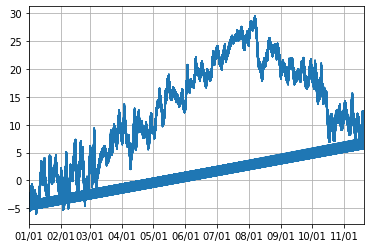

In [101]:

ax = plt.subplot()
ax.plot(dfObj['time'], dfObj['TMP_mea'])

# Formatterでx軸の日付ラベルを月・日に設定
xfmt = mdates.DateFormatter("%m/%d")

# DayLocatorで間隔を日数に
xloc = mdates.DayLocator(1)


ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(xfmt)

# x軸の範囲
ax.set_xlim(datetime.datetime(2021,1,1), datetime.datetime(2021,11,20)) 
ax.grid(True)
plt.show()

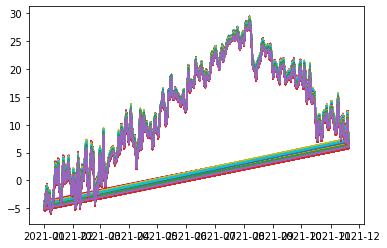

In [90]:
for key, grp in dfObj.groupby('xy'):
    plt.plot(grp['TMP_mea'],label=key)
plt.show()

In [ ]:
df_2 = df.groupby('A').sum()


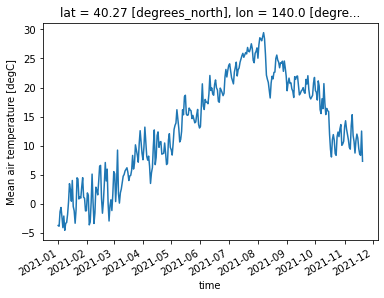

In [ ]:
# xarrayの標準の機能で単品データの表示
air1d = point_1_df_tmp_mean.isel(lat=0, lon=0)
air1d.plot()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


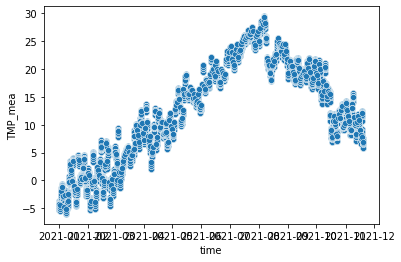

In [95]:
sns.scatterplot(dfObj['time'], dfObj['TMP_mea'])
plt.show()

<AxesSubplot:xlabel='time', ylabel='TMP_mea'>

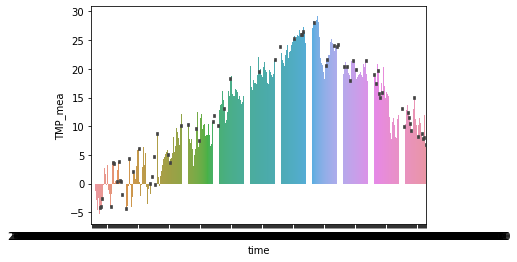

In [92]:
# dfm.reset_index(inplace=True)
sns.barplot(x='time', y='TMP_mea', data=dfObj)

KeyboardInterrupt: 

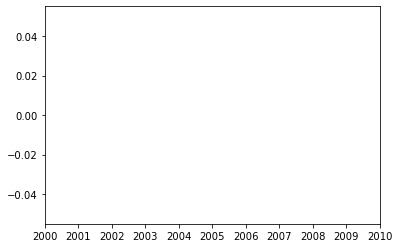

In [104]:
# 参考ブログのMatplotでの時系列表示 https://sabopy.com/py/seaborn-6/
fig,ax = plt.subplots()
sns.lineplot(x="time", y="TMP_mea", data=dfObj)
locator = mdates.AutoDateLocator(minticks=4, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.savefig("kyoto_temp_8_mdates.png",dpi=100) 